<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;"><img src=imagens/brasil-brasao.png alt="" /></td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Rep&uacute;blica Federativa do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img src="imagens/UFAM-logo.png" alt="" /></td>

</tr>
</tbody>
</table>

# Aprendizado de Máquina e Mineração de Dados
## Lista Prática de Análise de Dados

Professor _Marco Cristo_ 

**Aluno**: Mário Damhur Moraes Müller

__Introdução__: Neste trabalho, vamos analisar dados do INEP sobre o ENADE 2017. Estes dados estão organizados em uma releção com as informações do candidato necessárias para realizar a prova, além das suas notas e as respostas que os candidatos deram a questionários sobre a prova, seus dados pessoais e curso realizado. Em anexo, ao fim deste notebook, temos uma descrição detalhada das informações obtidas. 

#### Preliminares

In [1]:
# usar versão do Python 3.x

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sys

In [2]:
print('Python', sys.version)
print('--------')
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('SKLearn:', sklearn.__version__)
print('Seaborn:', sns.__version__)

Python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
--------
Pandas: 0.24.2
Numpy: 1.16.4
SKLearn: 0.21.2
Seaborn: 0.9.0


In [3]:
# Caminho do arquivo
egeral = pd.read_csv('./enade2017_EngenhariaTecnologiadeProducao.csv', sep=';')

In [4]:
egeral.sample(5)

,CO_IES,CO_CATEGAD,CO_ORGACAD,CURSO,CO_MODALIDADE,CO_UF_CURSO,REGIAO,NU_IDADE,TP_SEXO,ANO_FIM_EM,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
6878,1491,4,10020,Engenharia/Tecnologia de Producao,0,PR,SU,31,M,2004.0,...,5.0,4.0,5.0,5.0,5.0,5.0,6.0,5.0,8.0,8.0
11233,163,4,10028,Engenharia/Tecnologia de Producao,1,RJ,SE,22,F,2012.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2056,14,5,10028,Engenharia/Tecnologia de Producao,1,RS,SU,25,F,2008.0,...,6.0,6.0,5.0,6.0,6.0,6.0,6.0,7.0,5.0,6.0
230,572,1,10028,Engenharia/Tecnologia de Producao,1,RJ,SE,24,M,2010.0,...,6.0,6.0,5.0,6.0,5.0,6.0,7.0,6.0,6.0,6.0
15179,2,1,10028,Engenharia/Tecnologia de Producao,1,DF,CO,25,F,2010.0,...,5.0,5.0,5.0,6.0,5.0,6.0,6.0,5.0,7.0,4.0


In [5]:
egeral.shape

(23988, 105)

#### Análise de valores faltantes

<div class="alert alert-info">
<b>1</b> - Que colunas possuem campos nulos em **egeral**?
</div>

Há muitas formas de fazer isso em Pandas, como por exemplo através da utilização do método isnull()

In [6]:
egeral.columns[egeral.isnull().any()]

Index(['CO_TURNO_GRADUACAO', 'NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG',
       'NT_FG_D1', 'NT_FG_D1_PT', 'NT_FG_D1_CT', 'NT_FG_D2', 'NT_FG_D2_PT',
       'NT_FG_D2_CT', 'NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE', 'NT_CE_D1',
       'NT_CE_D2', 'NT_CE_D3', 'QE_I01', 'QE_I02', 'QE_I03', 'QE_I04',
       'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I14', 'QE_I15', 'QE_I16', 'QE_I17', 'QE_I18',
       'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22', 'QE_I23', 'QE_I24', 'QE_I25',
       'QE_I26', 'QE_I27', 'QE_I28', 'QE_I29', 'QE_I30', 'QE_I31', 'QE_I32',
       'QE_I33', 'QE_I34', 'QE_I35', 'QE_I36', 'QE_I37', 'QE_I38', 'QE_I39',
       'QE_I40', 'QE_I41', 'QE_I42', 'QE_I43', 'QE_I44', 'QE_I45', 'QE_I46',
       'QE_I47', 'QE_I48', 'QE_I49', 'QE_I50', 'QE_I51', 'QE_I52', 'QE_I53',
       'QE_I54', 'QE_I55', 'QE_I56', 'QE_I57', 'QE_I58', 'QE_I59', 'QE_I60',
       'QE_I61', 'QE_I62', 'QE_I63', 'QE_I64', 'QE_I65', 'QE_I66', 'QE_I67',
       'QE_I68'],

<div class="alert alert-info">
<b>2</b> - Substitua dados faltantes por valores razoáveis. No caso dos questionários, as colunas até QE_I26 podem ser substituídas por um 'Z'. As colunas após a QE_I26 podem ser substituídas por 7 (7 = _Não sei responder_).
</div>

No caso das notas, se elas forem NaN, podemos substituí-las por 0. Após isso, imprima o vetor resultante para confirmar se não há mais valores NaNs

In [7]:
egeral.isnull().sum().sum()

15920

In [8]:
egeral.CO_TURNO_GRADUACAO.isnull().sum()

136

In [9]:
egeral.CO_TURNO_GRADUACAO.describe()

count    23852.000000
mean         3.571147
std          0.859807
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: CO_TURNO_GRADUACAO, dtype: float64

In [10]:
egeral.CO_TURNO_GRADUACAO.value_counts()

4.0    17681
3.0     3950
1.0     1837
2.0      384
Name: CO_TURNO_GRADUACAO, dtype: int64

In [11]:
egeral.CO_TURNO_GRADUACAO.fillna(4, inplace=True)
egeral.CO_TURNO_GRADUACAO.isnull().sum()

0

<div class="alert alert-block alert-success">
<b>Como a quantidade de alunos com valor 4 (Noturno) é aproximadamente 75% de todo o dataset, então escolhi colocar os valores null desta coluna como 4 pois 136 instâncias não faria diferença absurda. </b>
</div>

In [12]:
colunas_notas = ['NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG',
       'NT_FG_D1', 'NT_FG_D1_PT', 'NT_FG_D1_CT', 'NT_FG_D2', 'NT_FG_D2_PT',
       'NT_FG_D2_CT', 'NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE', 'NT_CE_D1',
       'NT_CE_D2', 'NT_CE_D3']

colunas_Qcandidato = ['QE_I01', 'QE_I02', 'QE_I03', 'QE_I04',
       'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11',
       'QE_I12', 'QE_I13', 'QE_I14', 'QE_I15', 'QE_I16', 'QE_I17', 'QE_I18',
       'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22', 'QE_I23', 'QE_I24', 'QE_I25',
       'QE_I26']

colunas_Qcurso = ['QE_I27', 'QE_I28', 'QE_I29', 'QE_I30', 'QE_I31', 'QE_I32',
       'QE_I33', 'QE_I34', 'QE_I35', 'QE_I36', 'QE_I37', 'QE_I38', 'QE_I39',
       'QE_I40', 'QE_I41', 'QE_I42', 'QE_I43', 'QE_I44', 'QE_I45', 'QE_I46',
       'QE_I47', 'QE_I48', 'QE_I49', 'QE_I50', 'QE_I51', 'QE_I52', 'QE_I53',
       'QE_I54', 'QE_I55', 'QE_I56', 'QE_I57', 'QE_I58', 'QE_I59', 'QE_I60',
       'QE_I61', 'QE_I62', 'QE_I63', 'QE_I64', 'QE_I65', 'QE_I66', 'QE_I67',
       'QE_I68']

In [13]:
egeral[colunas_notas].isnull().sum()

NT_GER         9
NT_FG          9
NT_OBJ_FG      9
NT_DIS_FG      9
NT_FG_D1       9
NT_FG_D1_PT    9
NT_FG_D1_CT    9
NT_FG_D2       9
NT_FG_D2_PT    9
NT_FG_D2_CT    9
NT_CE          9
NT_OBJ_CE      9
NT_DIS_CE      9
NT_CE_D1       9
NT_CE_D2       9
NT_CE_D3       9
dtype: int64

In [14]:
egeral[colunas_notas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23988 entries, 0 to 23987
Data columns (total 16 columns):
NT_GER         23979 non-null float64
NT_FG          23979 non-null float64
NT_OBJ_FG      23979 non-null float64
NT_DIS_FG      23979 non-null float64
NT_FG_D1       23979 non-null float64
NT_FG_D1_PT    23979 non-null float64
NT_FG_D1_CT    23979 non-null float64
NT_FG_D2       23979 non-null float64
NT_FG_D2_PT    23979 non-null float64
NT_FG_D2_CT    23979 non-null float64
NT_CE          23979 non-null float64
NT_OBJ_CE      23979 non-null float64
NT_DIS_CE      23979 non-null float64
NT_CE_D1       23979 non-null float64
NT_CE_D2       23979 non-null float64
NT_CE_D3       23979 non-null float64
dtypes: float64(16)
memory usage: 2.9 MB


In [15]:
egeral[colunas_notas].describe()

,NT_GER,NT_FG,NT_OBJ_FG,NT_DIS_FG,NT_FG_D1,NT_FG_D1_PT,NT_FG_D1_CT,NT_FG_D2,NT_FG_D2_PT,NT_FG_D2_CT,NT_CE,NT_OBJ_CE,NT_DIS_CE,NT_CE_D1,NT_CE_D2,NT_CE_D3
count,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000
mean,41.781517,53.943042,52.575170,55.994850,57.612744,59.666583,57.201093,54.376955,54.619667,54.403853,37.711014,42.012678,13.320385,8.840444,25.397431,4.453272
std,12.699793,17.082992,21.341778,23.027135,24.792745,22.178989,26.842890,29.040287,24.893954,31.750414,13.810077,15.632813,9.935741,12.151015,15.906470,14.774111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.800000,42.700000,37.500000,45.000000,47.000000,55.000000,45.000000,42.000000,50.000000,45.000000,28.500000,31.800000,10.000000,0.000000,20.000000,0.000000
50%,41.000000,54.700000,50.000000,61.500000,63.000000,65.000000,60.000000,65.000000,60.000000,70.000000,36.500000,40.900000,11.700000,5.000000,30.000000,0.000000
75%,50.100000,66.100000,62.500000,72.500000,75.000000,75.000000,80.000000,73.000000,75.000000,75.000000,46.600000,50.000000,16.700000,10.000000,30.000000,0.000000
max,88.500000,98.800000,100.000000,98.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,91.300000,100.000000,80.000000,100.000000,100.000000,100.000000


In [16]:
median = egeral[colunas_notas].median()
egeral[colunas_notas] = egeral[colunas_notas].fillna(median)
egeral[colunas_notas].isnull().sum().sum()

0

<div class="alert alert-block alert-success">
<b> Para as notas decidi colocar os valores da média de cada coluna pois o valor 0 é considerado como outlier na minha opnião.</b>
</div>

In [17]:
egeral[colunas_Qcandidato].isnull().sum()

QE_I01    230
QE_I02    230
QE_I03    230
QE_I04    230
QE_I05    230
QE_I06    230
QE_I07    230
QE_I08    230
QE_I09    230
QE_I10    230
QE_I11    230
QE_I12    230
QE_I13    230
QE_I14    230
QE_I15    230
QE_I16    230
QE_I17    230
QE_I18    230
QE_I19    230
QE_I20    230
QE_I21    230
QE_I22    230
QE_I23    230
QE_I24    230
QE_I25    230
QE_I26    230
dtype: int64

In [18]:
egeral[colunas_Qcandidato].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23988 entries, 0 to 23987
Data columns (total 26 columns):
QE_I01    23758 non-null object
QE_I02    23758 non-null object
QE_I03    23758 non-null object
QE_I04    23758 non-null object
QE_I05    23758 non-null object
QE_I06    23758 non-null object
QE_I07    23758 non-null object
QE_I08    23758 non-null object
QE_I09    23758 non-null object
QE_I10    23758 non-null object
QE_I11    23758 non-null object
QE_I12    23758 non-null object
QE_I13    23758 non-null object
QE_I14    23758 non-null object
QE_I15    23758 non-null object
QE_I16    23758 non-null float64
QE_I17    23758 non-null object
QE_I18    23758 non-null object
QE_I19    23758 non-null object
QE_I20    23758 non-null object
QE_I21    23758 non-null object
QE_I22    23758 non-null object
QE_I23    23758 non-null object
QE_I24    23758 non-null object
QE_I25    23758 non-null object
QE_I26    23758 non-null object
dtypes: float64(1), object(25)
memory usage: 4.8+ MB


<div class="alert alert-block alert-success">
    <b>Identificado uma pegadinha na coluna 'QE_I16'. Além disso, não está catalogada no dicionário do dataset. </b>
</div>

In [19]:
egeral.drop('QE_I16', axis=1, inplace=True)
colunas_Qcandidato.remove('QE_I16')

In [20]:
egeral[colunas_Qcandidato].describe()

,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,...,QE_I17,QE_I18,QE_I19,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26
count,23758,23758,23758,23758,23758,23758,23758,23758,23758,23758,...,23758,23758,23758,23758,23758,23758,23758,23758,23758,23758
unique,5,6,3,6,6,6,8,7,6,5,...,6,5,7,11,2,5,5,5,8,9
top,A,A,A,D,D,B,D,C,C,E,...,A,A,B,C,A,B,B,E,A,F
freq,17681,14909,23538,8429,8393,13839,6222,5667,7856,12384,...,13399,19543,16146,10404,16849,10152,10582,15061,9929,9606


In [21]:
egeral[colunas_Qcandidato] = egeral[colunas_Qcandidato].fillna('Z')
egeral[colunas_Qcandidato].isnull().sum().sum()

0

In [22]:
egeral[colunas_Qcurso].isnull().sum()

QE_I27    230
QE_I28    230
QE_I29    230
QE_I30    230
QE_I31    230
QE_I32    230
QE_I33    230
QE_I34    230
QE_I35    230
QE_I36    230
QE_I37    230
QE_I38    230
QE_I39    230
QE_I40    230
QE_I41    230
QE_I42    230
QE_I43    230
QE_I44    230
QE_I45    230
QE_I46    230
QE_I47    230
QE_I48    230
QE_I49    230
QE_I50    230
QE_I51    230
QE_I52    230
QE_I53    230
QE_I54    230
QE_I55    230
QE_I56    230
QE_I57    230
QE_I58    230
QE_I59    230
QE_I60    230
QE_I61    230
QE_I62    230
QE_I63    230
QE_I64    230
QE_I65    230
QE_I66    230
QE_I67    230
QE_I68    230
dtype: int64

In [23]:
egeral[colunas_Qcurso].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23988 entries, 0 to 23987
Data columns (total 42 columns):
QE_I27    23758 non-null float64
QE_I28    23758 non-null float64
QE_I29    23758 non-null float64
QE_I30    23758 non-null float64
QE_I31    23758 non-null float64
QE_I32    23758 non-null float64
QE_I33    23758 non-null float64
QE_I34    23758 non-null float64
QE_I35    23758 non-null float64
QE_I36    23758 non-null float64
QE_I37    23758 non-null float64
QE_I38    23758 non-null float64
QE_I39    23758 non-null float64
QE_I40    23758 non-null float64
QE_I41    23758 non-null float64
QE_I42    23758 non-null float64
QE_I43    23758 non-null float64
QE_I44    23758 non-null float64
QE_I45    23758 non-null float64
QE_I46    23758 non-null float64
QE_I47    23758 non-null float64
QE_I48    23758 non-null float64
QE_I49    23758 non-null float64
QE_I50    23758 non-null float64
QE_I51    23758 non-null float64
QE_I52    23758 non-null float64
QE_I53    23758 non-null float64


In [24]:
egeral[colunas_Qcurso].describe()

,QE_I27,QE_I28,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
count,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,...,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000,23758.000000
mean,5.234784,5.186253,4.934464,4.866824,5.207214,5.405337,5.316272,5.243497,5.232974,5.210582,...,4.994949,4.898182,4.986447,4.884081,4.906305,5.247832,5.181960,5.162935,4.850998,5.079973
std,0.990173,1.143985,1.214797,1.292325,1.087355,0.975186,0.978007,1.049965,1.039755,1.018445,...,1.325588,1.431059,1.267943,1.426022,1.419048,1.098522,1.453556,1.208149,1.561611,1.346799
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
50%,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,5.000000,6.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [25]:
egeral[colunas_Qcurso] = egeral[colunas_Qcurso].fillna(7)
egeral[colunas_Qcurso].isnull().sum().sum()

0

In [26]:
egeral.columns[egeral.isnull().any()]

Index([], dtype='object')

In [27]:
egeral.isnull().sum().sum()

0

#### Consultando os dados e comparando distribuições

<div class="alert alert-info">
<b>3</b> - Considerando as distribuições de notas, quem se saiu melhor, os alunos da modalidade presencial ou à distância? _Dica_: boxplots são ótimos para comparar distribuições
</div>

Para várias questões a partir daqui, vamos eventualmente usar um dataframe extra, onde criamos colunas novas, em geral, que servem para fornecer descrição para outra colunas.

In [28]:
notas = egeral[['CO_MODALIDADE', 'NT_GER', 'NT_FG', 'NT_CE']]
aux_df = pd.melt(notas, id_vars=['CO_MODALIDADE'], var_name=['Notas'])
aux_df.head()

,CO_MODALIDADE,Notas,value
0,1,NT_GER,55.6
1,1,NT_GER,72.6
2,1,NT_GER,50.3
3,1,NT_GER,45.2
4,1,NT_GER,40.9


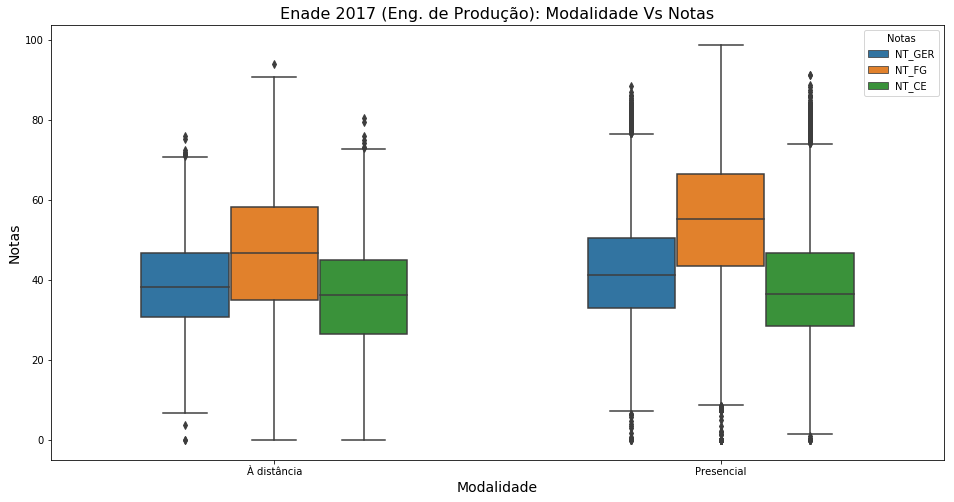

In [29]:
plt.figure(figsize=(16, 8))

ax = sns.boxplot(x="CO_MODALIDADE", y="value", hue="Notas", data=aux_df, width=0.6)
ax.axes.set_title("Enade 2017 (Eng. de Produção): Modalidade Vs Notas", fontsize=16)
ax.set_xlabel("Modalidade", fontsize=14)
ax.set_ylabel("Notas", fontsize=14)
ax.set_xticklabels(['À distância','Presencial'])
ax.tick_params(labelsize=10)

Explique os resultados obtidos.

<div class="alert alert-block alert-success">
<b>O boxplot gerado acima teve como objetivo comparar as distribuições entres as notas brutas da prova (Azul), notas brutas da formação geral (Laranja) e notas brutas no componente específico (Verde). São as variáveis que acredito serem mais importantes entre as notas.<br><br>

Analisando o gráfico, podemos concluir que as distribuições seguem uma distribuição gaussiana e que em geral os alunos da modalidade "à distância" se saíram melhor do que os alunos da modalidade presencial. Mesmo que os dados dos alunos na modalidade à distância tenha mais outliers do que os dados presenciais, nota-se que as distribuições das notas brutas específicas nas duas modalidades foram bastante similares, enquanto que nas outras duas notas percebe-se uma pequena diferença onde as notas dos alunos da modalidade à distância tende a ser maior tanto nas notas brutas na formação em geral quanto na notas brutas da prova (que é a variável mais importante).</b>
</div>

<div class="alert alert-info">
<b>4</b> - Novamente considere as distribuições de notas. Como se comparam os alunos do turno noturno com os dos demais turnos? Há mais alunos estudando ao dia ou à noite? 
</div> 

<div class="alert alert-block alert-success">
    <b>Podemos criar outro boxplot entre notas e turnos. Para verificar a quantidade podemos utilizar a função value_counts.</b>
</div>

In [30]:
notas_vs_turnos = egeral[['CO_TURNO_GRADUACAO', 'NT_GER', 'NT_FG', 'NT_CE']]
aux_df = pd.melt(notas_vs_turnos, id_vars=['CO_TURNO_GRADUACAO'], var_name=['Notas'])
aux_df.head()

,CO_TURNO_GRADUACAO,Notas,value
0,3.0,NT_GER,55.6
1,3.0,NT_GER,72.6
2,3.0,NT_GER,50.3
3,3.0,NT_GER,45.2
4,3.0,NT_GER,40.9


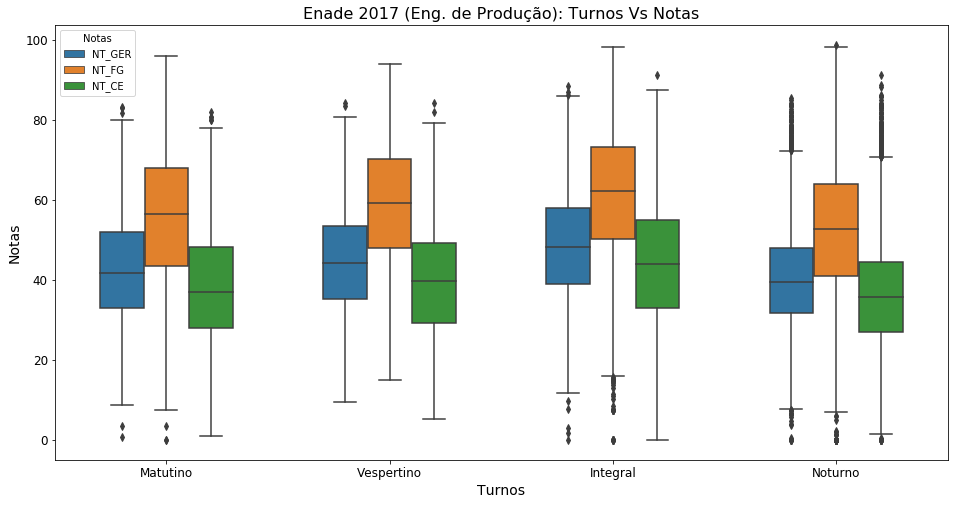

In [31]:
plt.figure(figsize=(16, 8))

ax = sns.boxplot(x="CO_TURNO_GRADUACAO", y="value", hue="Notas", data=aux_df, width=0.6)
ax.axes.set_title("Enade 2017 (Eng. de Produção): Turnos Vs Notas", fontsize=16)
ax.set_xlabel("Turnos", fontsize=14)
ax.set_ylabel("Notas", fontsize=14)
ax.set_xticklabels(['Matutino','Vespertino','Integral','Noturno'])
ax.tick_params(labelsize=12)

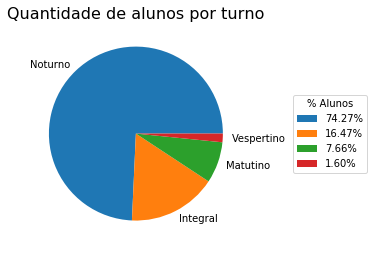

In [32]:
l = list(np.round(100*(egeral.CO_TURNO_GRADUACAO.value_counts()/egeral.shape[0]), 2))
l = ['{:.2f}%'.format(elm) for elm in l]

ax = pd.value_counts(egeral['CO_TURNO_GRADUACAO']).plot.pie(labels = ['Noturno','Integral','Matutino','Vespertino'])
ax.axes.set_title("Quantidade de alunos por turno", fontsize=16)
ax.set_ylabel("")
ax.legend(l,
          title="% Alunos",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

Explique os resultados obtidos.

<div class="alert alert-block alert-success">
    <b>De acordo com as distribuições, nota-se que os alunos do turno noturno possuem notas <i>menores</i> que os demais turnos, isso acontece pois a quantidade de alunos estudando no período noturno é cerca de 74.27% de todo o conjunto de dados, logo a média geral de notas de todos os alunos presentes neste turno tende a ter maiores ruídos, além de ter mais alunos com notas menores que a média geral, o que explica a média ser menor do que os demais turno. De acordo com gráfico, os alunos do turno integral possuem médias melhores que os demais turnos.<br><br>
        Existem mais alunos estudando no período da noite do que de dia. 
        </b>
    </div>

<div class="alert alert-info">
<b>5</b> - Em geral, o MEC acredita que **não** há importantes diferenças de desempenho entre alunos quotistas e não quotistas. Isto é o que você observa, considerando as distribuições de notas dos dois grupos? _Dica_: não são quotistas os alunos que responderam A à pergunta QE_I15.
</div>

In [33]:
egeral['Quotista'] = egeral['QE_I15'] != 'A'
notas_vs_quotistas = egeral[['Quotista', 'NT_GER', 'NT_FG', 'NT_CE']]
aux_df = pd.melt(notas_vs_quotistas, id_vars=['Quotista'], var_name=['Notas'])
aux_df.head()

,Quotista,Notas,value
0,False,NT_GER,55.6
1,False,NT_GER,72.6
2,False,NT_GER,50.3
3,False,NT_GER,45.2
4,False,NT_GER,40.9


In [34]:
egeral['QE_I15'].value_counts()

A    19271
D     1559
C     1343
E      920
F      408
B      257
Z      230
Name: QE_I15, dtype: int64

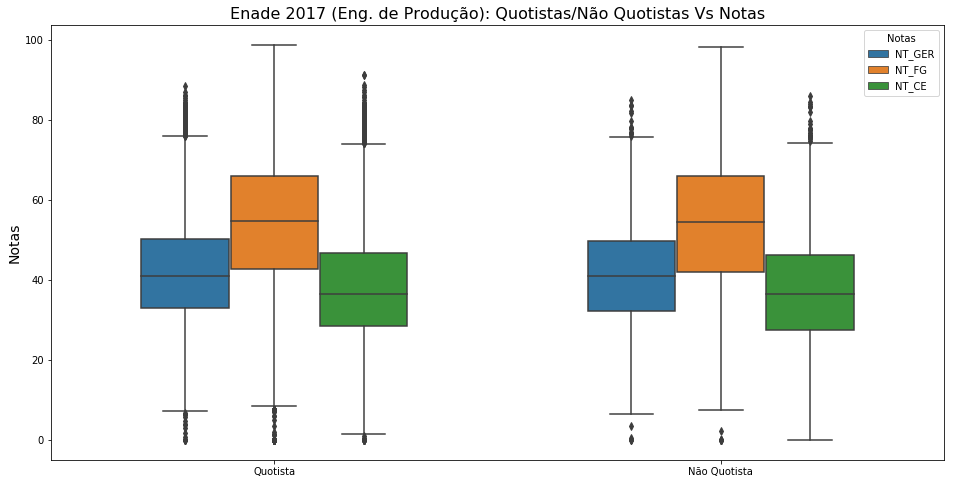

In [35]:
plt.figure(figsize=(16, 8))

ax = sns.boxplot(x="Quotista", y="value", hue="Notas", data=aux_df, width=0.6)
ax.axes.set_title("Enade 2017 (Eng. de Produção): Quotistas/Não Quotistas Vs Notas", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("Notas", fontsize=14)
ax.set_xticklabels(['Quotista', 'Não Quotista'])
ax.tick_params(labelsize=10)

Explique os resultados obtidos.

<div class="alert alert-block alert-success">
    <b>Sim, de fato não há importantes diferenças no desempenho em relação as duas distribuições como observado no gráfico acima.</b>
    </div>

<div class="alert alert-info">
<b>6</b> - Como se comparam os desempenhos dos alunos de instituíções públicas, privadas sem fim lucrativo e privadas com fim lucrativo?
</div>

<div class="alert alert-block alert-success">
    <b>Vamos criar boxplots entre as universidades públicas, entre as universidades privadas e por final entre públicas e privadas.</b>
    </div>

In [36]:
egeral_publicas = pd.DataFrame(egeral[egeral['CO_CATEGAD'] < 4])
egeral_publicas.CO_CATEGAD.value_counts()

1    4041
2    1286
3     171
Name: CO_CATEGAD, dtype: int64

In [37]:
notas_vs_publicas = egeral_publicas[['CO_CATEGAD', 'NT_GER', 'NT_FG', 'NT_CE']]
aux_df = pd.melt(notas_vs_publicas, id_vars=['CO_CATEGAD'], var_name=['Notas'])
aux_df.head()

,CO_CATEGAD,Notas,value
0,2,NT_GER,55.6
1,2,NT_GER,72.6
2,2,NT_GER,50.3
3,2,NT_GER,45.2
4,2,NT_GER,40.9


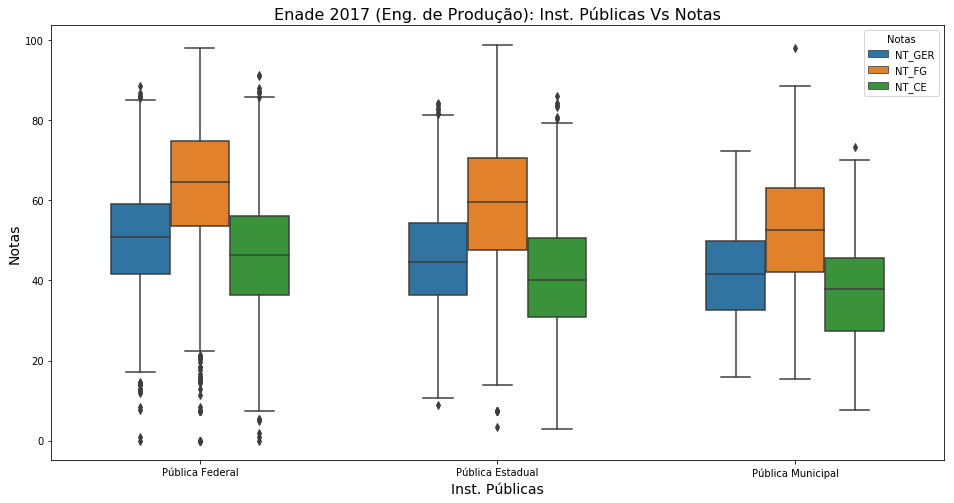

In [38]:
plt.figure(figsize=(16, 8))

ax = sns.boxplot(x="CO_CATEGAD", y="value", hue="Notas", data=aux_df, width=0.6)
ax.axes.set_title("Enade 2017 (Eng. de Produção): Inst. Públicas Vs Notas", fontsize=16)
ax.set_xlabel("Inst. Públicas", fontsize=14)
ax.set_ylabel("Notas", fontsize=14)
ax.set_xticklabels(['Pública Federal', 'Pública Estadual', 'Pública Municipal'])
ax.tick_params(labelsize=10)

In [39]:
egeral_privadas = pd.DataFrame(egeral[(egeral['CO_CATEGAD'] > 3) & (egeral['CO_CATEGAD'] < 6)])
egeral_privadas['CO_CATEGAD'].value_counts()

4    9327
5    9093
Name: CO_CATEGAD, dtype: int64

In [40]:
notas_vs_privadas = egeral_privadas[['CO_CATEGAD', 'NT_GER', 'NT_FG', 'NT_CE']]
aux_df = pd.melt(notas_vs_privadas, id_vars=['CO_CATEGAD'], var_name=['Notas'])
aux_df.head()

,CO_CATEGAD,Notas,value
0,4,NT_GER,58.5
1,4,NT_GER,28.7
2,4,NT_GER,33.1
3,4,NT_GER,38.3
4,4,NT_GER,58.6


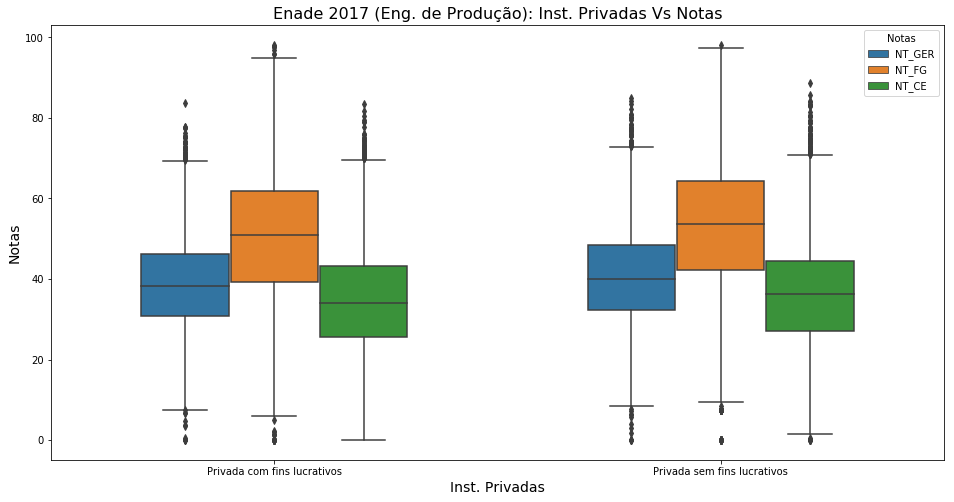

In [41]:
plt.figure(figsize=(16, 8))

ax = sns.boxplot(x="CO_CATEGAD", y="value", hue="Notas", data=aux_df, width=0.6)
ax.axes.set_title("Enade 2017 (Eng. de Produção): Inst. Privadas Vs Notas", fontsize=16)
ax.set_xlabel("Inst. Privadas", fontsize=14)
ax.set_ylabel("Notas", fontsize=14)
ax.set_xticklabels(['Privada com fins lucrativos', 'Privada sem fins lucrativos']) 
ax.tick_params(labelsize=10)

In [42]:
egeral.CO_CATEGAD.value_counts()

4    9327
5    9093
1    4041
2    1286
3     171
7      70
Name: CO_CATEGAD, dtype: int64

In [43]:
egeral_publicas_privadas = egeral[egeral.CO_CATEGAD != 7]
egeral_publicas_privadas['CATEGORIA'] = egeral_publicas_privadas['CO_CATEGAD'] < 4
egeral_publicas_privadas.CATEGORIA.value_counts()

/home/damhur/.tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    18420
True      5498
Name: CATEGORIA, dtype: int64

In [44]:
notas_vs_publicas_privadas = egeral_publicas_privadas[['CATEGORIA', 'NT_GER', 'NT_FG', 'NT_CE']]
aux_df = pd.melt(notas_vs_publicas_privadas, id_vars=['CATEGORIA'], var_name=['Notas'])
aux_df.head()

,CATEGORIA,Notas,value
0,True,NT_GER,55.6
1,True,NT_GER,72.6
2,True,NT_GER,50.3
3,True,NT_GER,45.2
4,True,NT_GER,40.9


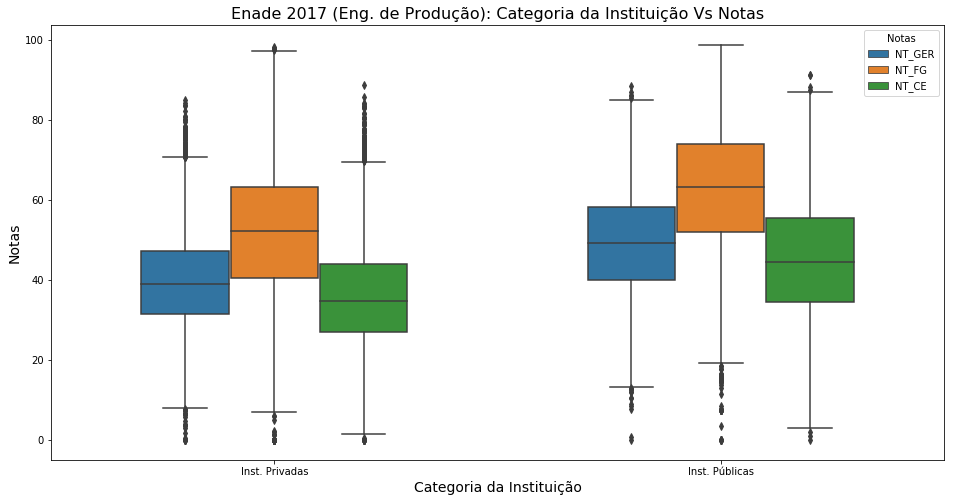

In [45]:
plt.figure(figsize=(16, 8))

ax = sns.boxplot(x="CATEGORIA", y="value", hue="Notas", data=aux_df, width=0.6)
ax.axes.set_title("Enade 2017 (Eng. de Produção): Categoria da Instituição Vs Notas", fontsize=16)
ax.set_xlabel("Categoria da Instituição", fontsize=14)
ax.set_ylabel("Notas", fontsize=14)
ax.set_xticklabels(['Inst. Privadas', 'Inst. Públicas']) 
ax.tick_params(labelsize=10)

Comente sobre os resultados obtidos.

<div class="alert alert-block alert-success">
    <b>Entre as distribuições de notas de instituições públicas, os gráficos mostram que os alunos de instituições públicas federal possuem, em geral, notas maiores que os alunos de instituições estadual e municipal.<br><br>
    Já as notas dos alunos de instituições privadas, nota-se que os alunos de instituições privadas sem fins lucrativos possuem notas melhores que os alunos de instituições privadas com fins lucrativos, apesar da margem de diferença não ser tão significativa.<br><br>
    De forma geral, entre instituições públicas e privadas, os alunos de instituições públicas possuem melhores notas que os alunos de instituições privadas, com uma margem de diferença significativa, mesmo em menor número de alunos (22,98% são alunos de instituições públicas).
    </b>
    </div>

#### Cruzando dados

Os motivos elencados para descrever o que leva um candidato a escolher seu curso incluem:

A = Inserção no mercado de trabalho.<br>B = Influência familiar.<br>C = Valorização profissional.<br>D = Prestígio Social.<br>E = Vocação.<br>F = Oferecimento do curso na modalidade a distância.<br>G = Baixa concorrência para ingresso.<br>H = Outro motivo. 

<div class="alert alert-info">
<b>7</b> - Cruze a informação sobre o turno do curso do aluno com a resposta dada a esta pergunta (QE_I25), de forma a obter, para os motivos dados, o percentual de alunos que os escolheram, de acordo com os cursos realizados.
</div>

In [46]:
pd.crosstab(egeral.QE_I25, egeral.CO_TURNO_GRADUACAO).apply(lambda r: np.round(100*r/r.sum(), 2), axis=0)

CO_TURNO_GRADUACAO,1.0,2.0,3.0,4.0
QE_I25,,,,
A,40.56,40.62,44.15,40.88
B,3.38,4.69,4.03,3.58
C,24.06,14.06,18.51,28.97
D,0.60,0.52,0.61,0.59
E,18.45,23.70,20.86,15.18
F,2.23,0.00,0.76,0.53
G,0.49,0.26,0.99,0.26
H,9.25,14.84,8.94,9.11
Z,0.98,1.30,1.16,0.90


Text(0.5, 0, 'Motivos Elencados')

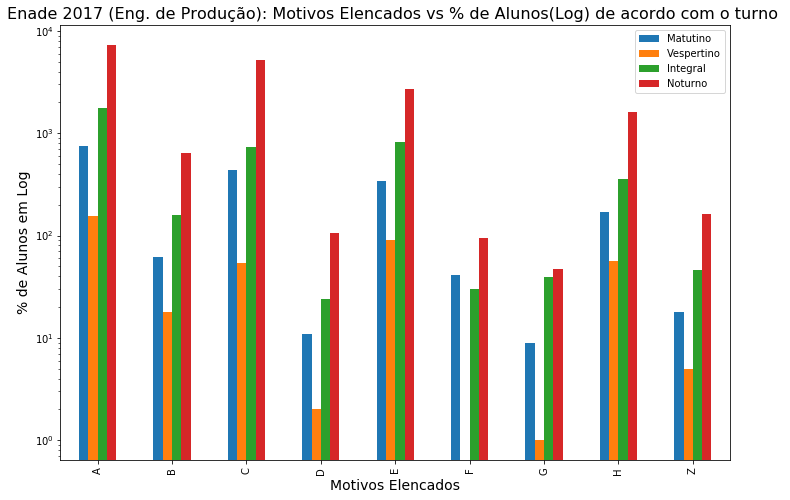

In [47]:
ax = pd.crosstab(egeral.QE_I25, egeral.CO_TURNO_GRADUACAO).plot(kind='bar', logy=True, figsize=(12,8), grid=False)
ax.legend(['Matutino','Vespertino','Integral','Noturno'])
ax.axes.set_title("Enade 2017 (Eng. de Produção): Motivos Elencados vs % de Alunos(Log) de acordo com o turno ", fontsize=16)
ax.set_ylabel('% de Alunos em Log', fontsize=14)
ax.set_xlabel('Motivos Elencados', fontsize=14)

Comente sobre os resultados obtidos.

<div class="alert alert-block alert-success">
<b> De acordo com a tabela, os três maiores percentuais de alunos que escolheram o turno Matutino foram por motivos elencados a inserção no mercado de trabalho (40.56%), valorização profissional (24.06%) e vocação (18.45%). Em relação ao turno Vespertino foram inserção no mercado de trabalho (40.62%), valorização profissional (14.06%) e outros motivos (14.84%). Em relação ao turno Integral foram inserção no mercado de trabalho (44.15%), valorização profissional (18.51%) e vocação (20.86%). Por último, em relação ao turno Noturno foram inserção no mercado de trabalho (40.88%), valorização profissional (28.97%) e vocação (15.18%).<br>
    
Em geral, os motivos elecandos que leva um aluno a escolher o seu curso de acordo com o turno é a inserção no mercado de trabalho, valorização profissional e vocação.
</b>
</div>

Considerando as seguintes faixas de renda (QE_I08):

A = Até 1,5 salário mínimo (até R\$ 1.086,00).<br>B = De 1,5 a 3 salários mínimos (R\$ 1.086,01 a R\$ 2.172,00).<br>C = De 3 a 4,5 salários mínimos (R\$ 2.172,01 a R\$ 3.258,00).<br>D = De 4,5 a 6 salários mínimos (R\$ 3.258,01 a R\$ 4.344,00).<br>E = De 6 a 10 salários mínimos (R\$ 4.344,01 a R\$ 7.240,00).<br>F = De 10 a 30 salários mínimos (R\$ 7.240,01 a R\$ 21.720,00).<br>G = Acima de 30 salários mínimos (mais de R\$ 21.720,01).

<div class="alert alert-info">
<b>8</b> - É verdade que, quando comparado às instituíções privadas, estão nos cursos das universidades federais tanto os estudantes mais pobres quanto os mais ricos do país?
</div>

In [48]:
pd.crosstab(egeral_privadas.CO_CATEGAD, egeral_privadas.QE_I08).apply(lambda r: np.round(100*r/r.sum(), 2), axis=1)

QE_I08,A,B,C,D,E,F,G,Z
CO_CATEGAD,,,,,,,,
4,10.17,25.83,25.02,14.70,14.72,7.30,1.14,1.12
5,8.04,18.83,24.99,15.03,18.00,11.49,2.96,0.66


[Text(0, 0, 'Privadas com fins lucrativos'),
 Text(0, 0, 'Privadas sem fins lucrativos')]

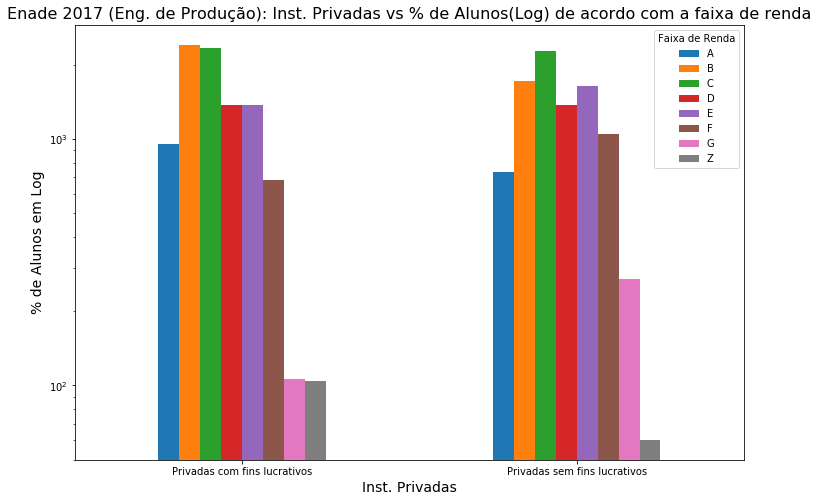

In [49]:
ax = pd.crosstab(egeral_privadas.CO_CATEGAD, egeral_privadas.QE_I08).plot(kind='bar', logy=True, figsize=(12,8), grid=False)

ax.axes.set_title("Enade 2017 (Eng. de Produção): Inst. Privadas vs % de Alunos(Log) de acordo com a faixa de renda", fontsize=16)
ax.legend(title='Faixa de Renda')
ax.set_ylabel('% de Alunos em Log', fontsize=14)
ax.set_xlabel('Inst. Privadas', fontsize=14)
ax.set_xticklabels(['Privadas com fins lucrativos', 'Privadas sem fins lucrativos'], rotation = 0) 

Comente sobre os resultados.

<div class="alert alert-block alert-success">
<b>Considerado os alunos mais pobres sendo de até 1,5 salário mínimo (A) e os alunos mais ricos acima de 10 salários mínimos (F, G). A tabela mostra que os alunos mais pobres representam cerca de 10.17% das instituições privadas com fins lucrativos e 8.04% das instituições privadas sem fins lucrativos, enquanto que 8.44% representam os alunos mais ricos nas instituições privadas com fins lucrativos e 14.45% sem fins lucrativos. O que demonstra que em geral a diferença de proporção entre alunos mais pobres e alunos mais ricos comparados às instituições privadas, possuem uma margem de diferença de menos de 5%, logo, podemos afirmar que ambas as classes estão presentes nas universidades federais.</b>
 </div>
    

#### Obtendo valor consolidado sobre dados cruzados (pivô)

Considerando como foi o ensino médio dos alunos, de acordo com as opções em QE_I17:

A = Todo em escola pública.<br>B = Todo em escola privada (particular).<br>C = Todo no exterior.<br>D = A maior parte em escola pública.<br>E = A maior parte em escola privada (particular).<br>F = Parte no Brasil e parte no exterior.

<div class="alert alert-info">
<b>9</b> - Qual a nota geral média dos alunos, de acordo com a forma como ele cursou ensino médio?
</div>

In [50]:
egeral_pivot = egeral.pivot_table(values = ['NT_GER'], 
                                    index = ['QE_I17'], 
                                    aggfunc = np.mean)
egeral_pivot.sort_values('NT_GER', ascending=True, inplace=True)

Text(0.5, 0, 'Nota Média')

<Figure size 720x576 with 0 Axes>

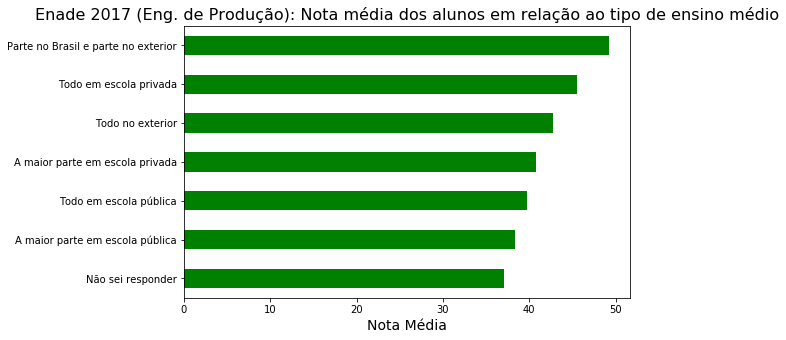

In [51]:
plt.figure(figsize=(10, 8))
ax = egeral_pivot.plot(kind='barh', color='g', grid=False, figsize=(8,5))

ax.axes.set_title("Enade 2017 (Eng. de Produção): Nota média dos alunos em relação ao tipo de ensino médio", fontsize=16)
ax.legend().remove()
ax.set_ylabel('')
ax.set_yticklabels(['Não sei responder', 'A maior parte em escola pública', 'Todo em escola pública', 'A maior parte em escola privada',
                     'Todo no exterior', 'Todo em escola privada', 'Parte no Brasil e parte no exterior']) 
ax.set_xlabel('Nota Média', fontsize=14)

Comente sobre os resultados.

<div class="alert alert-block alert-success">
<b>Os alunos que obtiveram a maior nota geral média foram os que cursaram ensino médio parte no Brasil e parte no exterior. Em geral, os alunos que possuem condições financeiras melhores para estudar em escolas particulares ou no exterior obtiveram médias melhores do que os alunos de escolas públicas.</b>
</div>

<div class="alert alert-info">
<b>10</b> - Qual a nota geral média dos alunos, de acordo com sua renda, por regiao? Caso sua base se refira a uma única região, considere a renda por estado daquela região.
</div>

In [52]:
egeral_pivot = egeral.pivot_table(values = ['NT_GER'], 
                                    index = ['QE_I08', 'REGIAO'], 
                                    aggfunc = np.mean)
egeral_pivot.sort_values('NT_GER', ascending=True, inplace=True)

Text(0.5, 0, 'Nota Média')

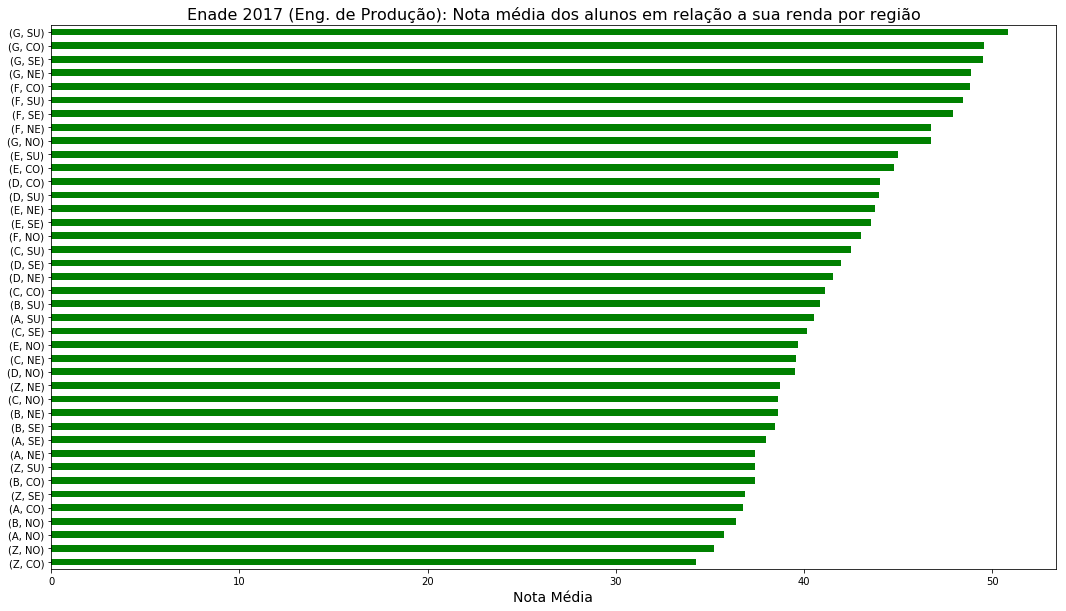

In [53]:
ax = egeral_pivot.plot(kind='barh', color='g', figsize=(18,10), grid=False)
ax.axes.set_title("Enade 2017 (Eng. de Produção): Nota média dos alunos em relação a sua renda por região", fontsize=16)
ax.legend().remove()
ax.set_ylabel('')
ax.set_xlabel('Nota Média', fontsize=14)

Explique os resultados.

<div class="alert alert-block alert-success">
<b>
Bom, em geral, a menor média geral de notas para qualquer classe de renda são da região Norte enquanto que a maior média geral de notas para a maioria das classes de renda são da região Sudeste (perdendo apenas para o Centro Oeste na classe de renda D).
    </b>
    </div>

#### Agrupando e ordenando dados

<div class="alert alert-info">
<b>11</b> - Qual o ranking dos estados de acordo com a nota média obtida por alunos, considerando apenas instituições públicas?
</div>

In [54]:
egeral_publicas.groupby(['REGIAO'])['NT_GER'].mean().sort_values(ascending=False)

REGIAO
SE    50.321451
SU    49.417102
NE    47.662558
CO    45.431043
NO    40.131073
Name: NT_GER, dtype: float64

Text(0.5, 0, 'Nota Média')

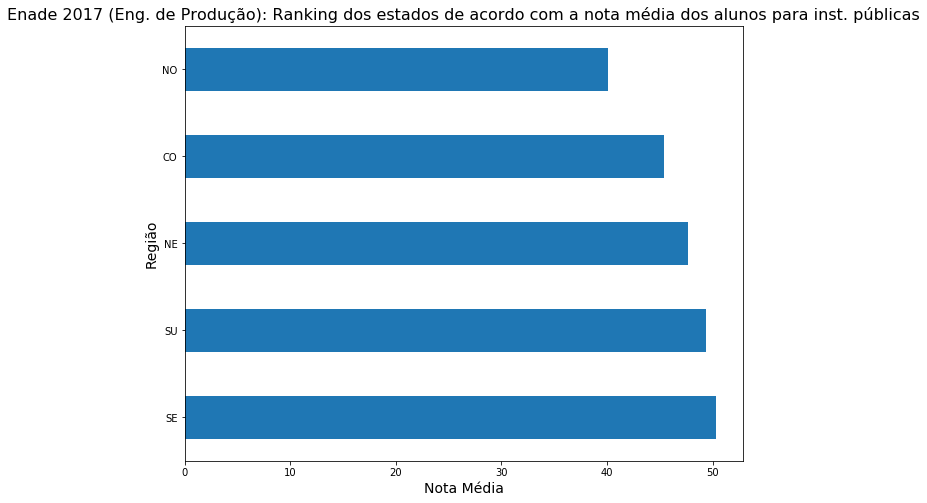

In [55]:
plt.figure(figsize=(10, 8))
ax = egeral_publicas.groupby(['REGIAO'])['NT_GER'].mean().sort_values(ascending=False).plot(kind='barh', grid=False)
ax.axes.set_title("Enade 2017 (Eng. de Produção): Ranking dos estados de acordo com a nota média dos alunos para inst. públicas", fontsize=16)

ax.set_ylabel('Região', fontsize=14)
ax.set_xlabel('Nota Média', fontsize=14)

Explique os resultados obtidos.

<div class="alert alert-block alert-success">
<b>Os resultados refletem a análise feita na questão 10, onde a região sudeste possui a maior média de notas e a região norte possui a menor, com uma margem de significante de diferença.</b>
    </div>

#### Comportamentos anômalos

<div class="alert alert-info">
<b>12</b> - Como se comparam as variáveis **idade**, **nota geral**, **ano de início da graduação** e **ano de fim do ensino médio** em termos de anomalias?
</div>

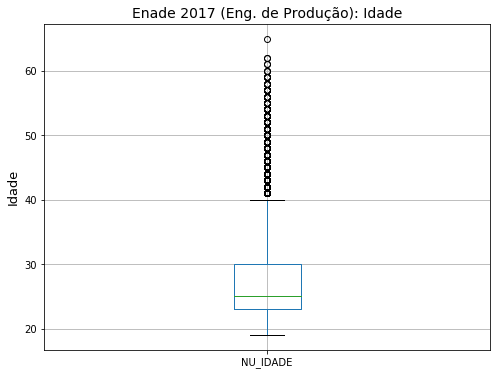

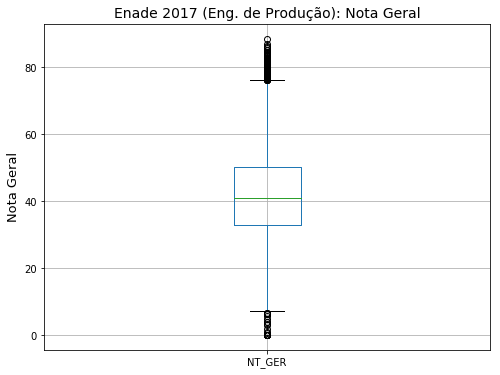

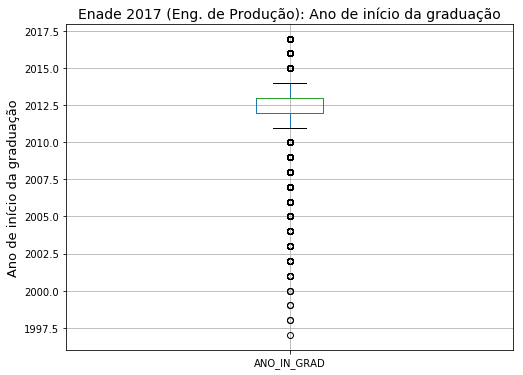

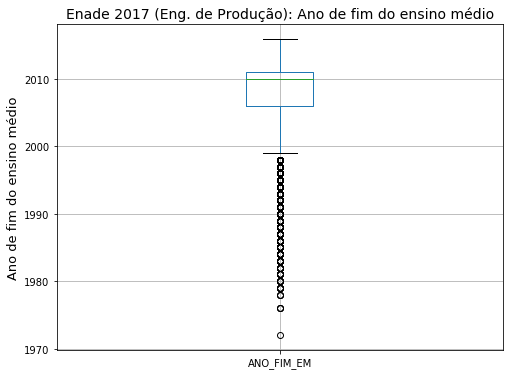

In [56]:
columns_target = ['NU_IDADE', 'NT_GER', 'ANO_IN_GRAD', 'ANO_FIM_EM']
label = ['Idade', 'Nota Geral', 'Ano de início da graduação', 'Ano de fim do ensino médio']
i = 0
for column in columns_target:
    plt.figure(figsize=(8,6))
    ax = egeral.boxplot(column)
    ax.axes.set_title("Enade 2017 (Eng. de Produção): "+label[i], fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel(label[i], fontsize=13)
    plt.show()
    i = i + 1

Dica: Utilize BOXPLOT ou histograma para facilitar o entendimento.

Comente sobre os resultados.

<div class="alert alert-block alert-success">
<b>Em todas as variáveis analisadas é possível identificar uma quantidade considerável de outliers.<br>
   Os outliers representados na variável 'idade' podem ser interpretadas como os alunos de mais idades (acima de 40 anos).<br>
   Os outliers representados na variável 'notas' podem ser interpretadas como os alunos que obtiveram notas muito baixas e alunos com notas muito altas. <br>
   Os outliers representados na variável 'ano de início da graduação' podem ser interpretadas como os alunos que começaram a graduação há muito tempo e ainda não concluíram (desperiodizados ou na lista para serem jubilados) e os alunos que ingressaram na faculdade e já estão concluíndo rapidamente. <br>
   Os outliers representados na variável 'ano de fim do ensino médio' são os alunos mais velhos que terminaram o ensino médio há muito tempo e depois ingressaram nas universidades. Reflete o inverso da variável idade.
    </b>
    </div>

#### Engenharia de atributos

As questões QE_I27 a QE_I68 nos permitem avaliar quão boa é a instituição de acordo com a visão dos estudantes. Ela deve ser calculada como:

NT_INST = $\frac{1}{N} \sum_{i=27}^{68} \frac{f(\text{QE_I}_i) - 1}{5}$

onde $f$ é uma função que retorna o valor de QE_I$_i$ se ele estiver entre 1 a 6; ela retorna 1, caso contrário. $N$ é o total de questões, entre QE_I27 a QE_I68, que tiveram nota entre 1 a 6.

<div class="alert alert-info">
<b>13</b> - Seguindo a definição dada, crie a coluna NT_INST que reflete a nota que cada estudante daria para a instituição. 
</div>    

In [57]:
def calc_nt(row):
    a = []
    c = 0.0
    for col in qi_df.columns:
        if row[col] < 7:
            a.append(row[col])
            c = c + 1
        else:
            a.append(1.0)
    b = []
    for i in range(42):
        b.append(((a[i] - 1)/5))
    result = sum(b)
    if c == 0:
        return 0.0
    else:
        return (result/c)

In [58]:
qi_df = egeral.loc[:,'QE_I27':'QE_I68']
egeral['NT_INST'] = qi_df.apply(lambda row: calc_nt(row), axis=1)

In [59]:
egeral['NT_INST'].sample(5)

13739    0.647368
9729     0.638095
2323     0.845000
6308     0.757143
22839    0.923810
Name: NT_INST, dtype: float64

In [60]:
egeral['NT_INST'].describe()

count    23988.000000
mean         0.781938
std          0.199391
min          0.000000
25%          0.668293
50%          0.814286
75%          0.952381
max          1.000000
Name: NT_INST, dtype: float64

#### Preparando dados para classificação

Queremos tentar prever a nota de um aluno apartir das seguintes informações:

* CO_CATEGAD, CO_ORGACAD, CO_MODALIDADE, CO_UF_CURSO, REGIAO,  
* NU_IDADE, TP_SEXO, CO_TURNO_GRADUACAO, 
* QE_I01, QE_I02, QE_I03, QE_I04, QE_I05, QE_I06, QE_I07, QE_I08, QE_I09, QE_I10, QE_I11, QE_I12, QE_I13, QE_I14, QE_I15, QE_I17, QE_I18, QE_I19, QE_I20, QE_I21, QE_I22, QE_I23, QE_I24, QE_I25, QE_I26 
* NT_INST

<div class="alert alert-info">
<b>14</b> - Prepare os dados para aprendizado, convertendo strings para dados categóricos, dados categóricos não binários para hot-vectors e padronizando dados numéricos usando Z-score.
</div> 

In [61]:
colunas_to_cat = ['CO_UF_CURSO', 'REGIAO', 'TP_SEXO', 'QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
       'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
       'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
       'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26']

colunas_to_hot_vectors = ['CO_CATEGAD', 'CO_ORGACAD', 'CO_UF_CURSO', 'REGIAO', 'CO_TURNO_GRADUACAO', 'QE_I01', 'QE_I02', 'QE_I03', 'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07',
       'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14',
       'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22',
       'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26']

colunas_to_zscore = ['NU_IDADE', 'NT_INST']

In [62]:
cols = list(set(colunas_to_cat + colunas_to_hot_vectors + colunas_to_zscore))
egeral_ml = egeral[cols].copy()

In [63]:
for c in colunas_to_cat:
    egeral_ml[c] = egeral_ml[c].astype('category').cat.codes

In [64]:
for c in colunas_to_hot_vectors:
    egeral_ml = pd.concat([egeral_ml, pd.get_dummies(egeral_ml[c], prefix = c)], 
              axis=1).drop(c, axis = 1)

In [65]:
for c in colunas_to_zscore:
    egeral_ml[c] = (egeral_ml[c] - egeral_ml[c].mean())/egeral_ml[c].std()

In [66]:
limiar = egeral['NT_GER'].mean()
egeral_ml['Aprovado'] = egeral['NT_GER'].apply(lambda row: 1 if row > limiar else 0)

colunas = list(egeral_ml.columns.values)
colunas.remove('Aprovado')

X = egeral_ml[colunas].values
y = egeral_ml['Aprovado'].values

In [67]:
egeral_ml['Aprovado'].head()

0    1
1    1
2    1
3    1
4    0
Name: Aprovado, dtype: int64

In [68]:
egeral['NT_GER'].head()

0    55.6
1    72.6
2    50.3
3    45.2
4    40.9
Name: NT_GER, dtype: float64

## Questão bônus 
### Classificação

Se você gerou os dados corretamente, você pode agora tentar prever, dado um aluno, se ele vai passar ou não no ENADE:

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((16071, 229), (7917, 229))

In [70]:
n_estimators = [100, 300, 500, 800, 1000, 1200, 1500, 2000]
criterion = ['gini', 'entropy']
max_depth = [None, 3, 5, 10]

random_param = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_depth': max_depth}

clf = RandomForestClassifier()
rs = RandomizedSearchCV(clf, random_param, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [71]:
from sklearn.metrics import roc_auc_score

print('Best estimator:', rs.best_estimator_)
print('')
print('Best parameters from random grid:', rs.best_params_)
print('Best score from random grid:', np.round(100*rs.best_score_, 2))
clf_final = rs.best_estimator_
y_pred = clf_final.predict(X_test)
roc_auc = np.round(100*roc_auc_score(y_test, y_pred), 2)
print('ROC AUC on Test:', roc_auc)

Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Best parameters from random grid: {'n_estimators': 1000, 'max_depth': None, 'criterion': 'entropy'}
Best score from random grid: 72.75
ROC AUC on Test: 66.63


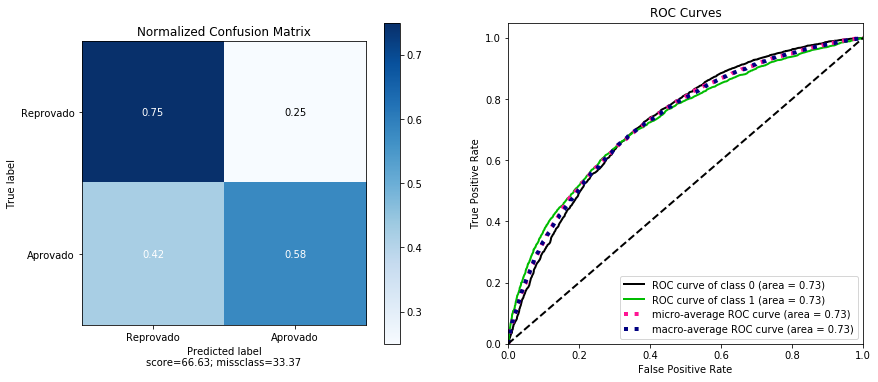

In [72]:
import scikitplot as skplt

plt.figure(figsize=(14,13))
ax1 = plt.subplot(221)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, ax=ax1)
ax1.set_yticklabels(['Reprovado', 'Aprovado'])
ax1.set_xticklabels(['Reprovado', 'Aprovado']) 
ax1.set_xlabel('Predicted label\nscore={:0.2f}; missclass={:0.2f}'.format(roc_auc, 100 - roc_auc))

y_probas = clf_final.predict_proba(X_test)
ax2 = plt.subplot(222)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8,8), ax=ax2)


<div class="alert alert-info">
<b>15</b> - Que atributos a RandomForest julgou mais relevantes para determinar se o aluno vai ou não passar?
</div>

In [73]:
feature_importances = pd.DataFrame(clf_final.feature_importances_,
                                   index = colunas,
                                   columns=['Importância']).sort_values('Importância', ascending=False)
feature_importances[:10]

,Importância
NT_INST,0.050586
NU_IDADE,0.046927
QE_I11_0,0.012332
CO_CATEGAD_1,0.012317
TP_SEXO,0.012091
QE_I22_1,0.010789
QE_I25_0,0.010711
QE_I26_5,0.010661
QE_I20_2,0.010458
QE_I23_1,0.010455
